In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
import scipy.integrate as integrate

$$Lift = C_l \frac{1}{2}\rho v^2 A $$

In [8]:
rho = 1.225 # kg/m^3
v = 18 # m/s

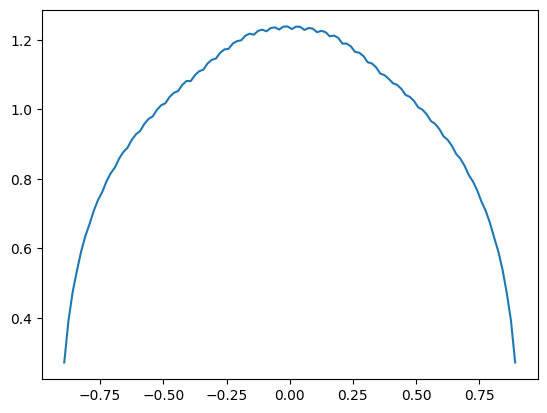

In [9]:
df = pd.read_csv('Book1.csv')
df['area'] = df['del_y']*df['Chord']
df['lift'] = df['area']*df['cl']*0.5*rho*v**2
plt.plot(df['y_span'],df['lift'])

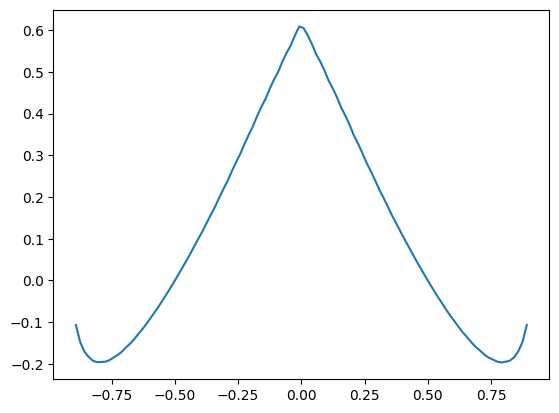

In [10]:
wing = pd.DataFrame()
wing['y_span'] = df['y_span']
wing['lift'] = df['lift']
pin_a = -0.5
pin_b = 0.5
moment = []

for index, row in wing.iterrows():
    if row['y_span'] < pin_a: # to left of pin a
        moment.append(row['lift']*(row['y_span']-pin_a))
    elif row['y_span'] > pin_a and row['y_span'] < 0: # between pin a and center
        moment.append(row['lift']*((row['y_span']-pin_a)))
    elif row['y_span'] > 0 and row['y_span'] < pin_b: # between center and pin b
        moment.append(row['lift']*(pin_b-(row['y_span']))) 
    else: #to the right of pin b
           moment.append(row['lift']*(pin_b-(row['y_span'])))


plt.plot(wing['y_span'],moment)




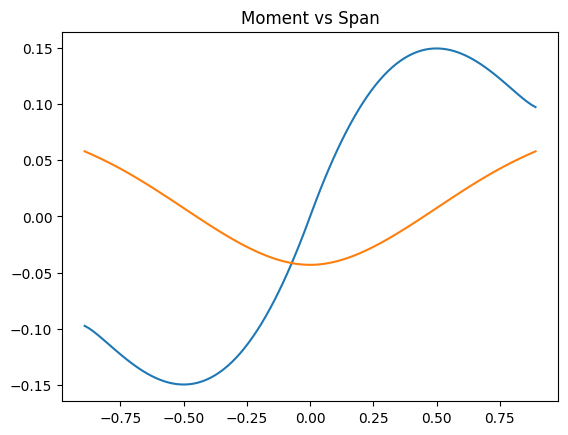

In [11]:
plt.title('Moment vs Span')
theta = integrate.cumulative_trapezoid(moment,wing['y_span'],initial = 0)
theta = integrate.cumulative_trapezoid(moment, wing['y_span'], initial=0)
theta -= np.median(theta)
plt.plot(wing['y_span'], theta,label = 'theta')
displacement = integrate.cumulative_trapezoid(theta, wing['y_span'], initial=0)
displacement -= np.median(displacement)
plt.plot(wing['y_span'], displacement,label = 'displacement')

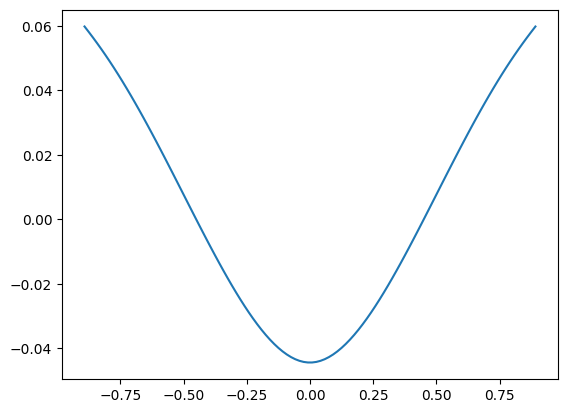

In [21]:
E = 300*10**9                           # GPA
d_in = 0.01905                          # m
d_out = 0.021082                        # m
I = ((np.pi)/64) * (d_out**4-d_in**4)   # m^4

displacement_scaled = []

for x in displacement:
    displacement_scaled.append((x/(E*I))*1000)      #displacement in mm

plt.plot(wing['y_span'], displacement_scaled,label = 'displacement')

In [16]:
moment_max = max(moment, key=abs)               #N*m

stress_max = ((moment_max*(d_out/2))/I)/10**6   #MPa

stress_max

1.9862249040535978